In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import os
import tarfile
import urllib.request

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path,filter='fully_trusted')
    housing_tgz.close()

fetch_housing_data()

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [2]:
housing = load_housing_data()

In [3]:
housing[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [4]:
import math
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

C:\Users\morga\AppData\Local\Temp\ipykernel_21516\1931596769.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [5]:
housing["median_income"].median()

np.float64(3.5347999999999997)

Saving figure california_housing_prices_plot


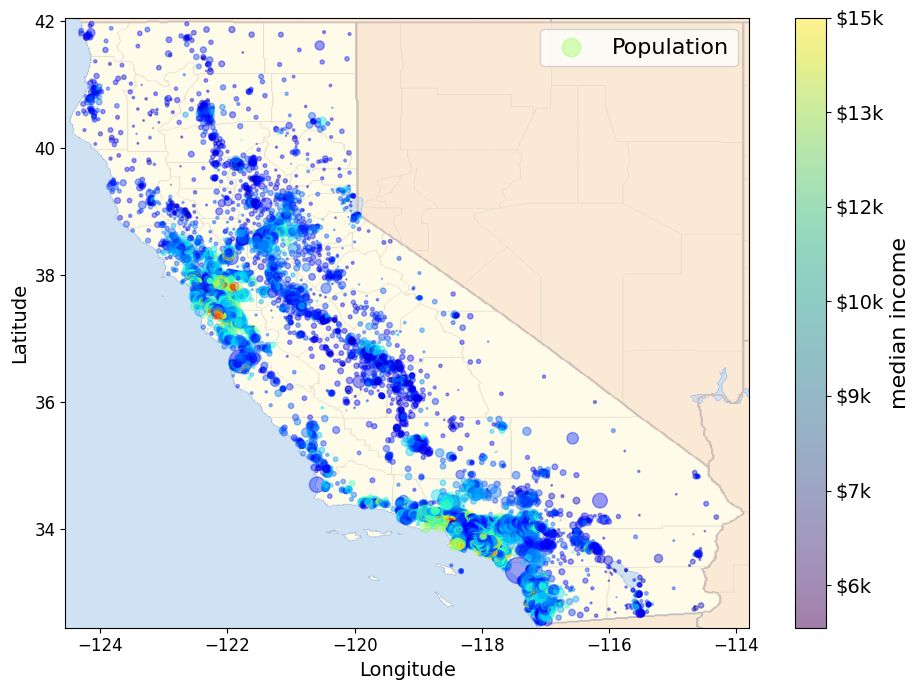

In [6]:
import matplotlib.image as mpimg
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_income",cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_income"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(v) for v in tick_values], fontsize=14)
cbar.set_label('median income', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [7]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
housing = pd.get_dummies(housing)

In [9]:
housing.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = housing  
# [['longitude', 'latitude', 'median_income']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
housing['cluster'] = kmeans.fit_predict(scaled_features)

In [11]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False,4
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False,4
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False,4
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False,4


In [29]:
kmeans.cluster_centers_

array([[-1.19573273e+02,  3.53059342e+01,  2.84250102e+01,
         2.86477361e+03,  5.76970058e+02,  1.50480829e+03,
         5.44202954e+02,  4.24117118e+00,  2.37217084e+05,
         6.07234792e-01,  1.14483132e-01,  2.70965994e-04,
         1.29115296e-01,  1.48895814e-01],
       [-1.19845410e+02,  3.53968511e+01,  3.19872774e+01,
         3.00861705e+03,  5.35619275e+02,  1.25157506e+03,
         5.04263041e+02,  6.23661116e+00,  4.23741592e+05,
         5.44529262e-01,  4.64376590e-02,  9.54198473e-04,
         2.05470738e-01,  2.02608142e-01],
       [-1.19481404e+02,  3.59427405e+01,  2.77554128e+01,
         2.35275966e+03,  5.07933861e+02,  1.42164093e+03,
         4.65480376e+02,  2.86491938e+00,  1.17287315e+05,
         2.90855166e-01,  5.49678695e-01,  2.08708918e-18,
         6.83143846e-02,  9.11517548e-02]])

In [30]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

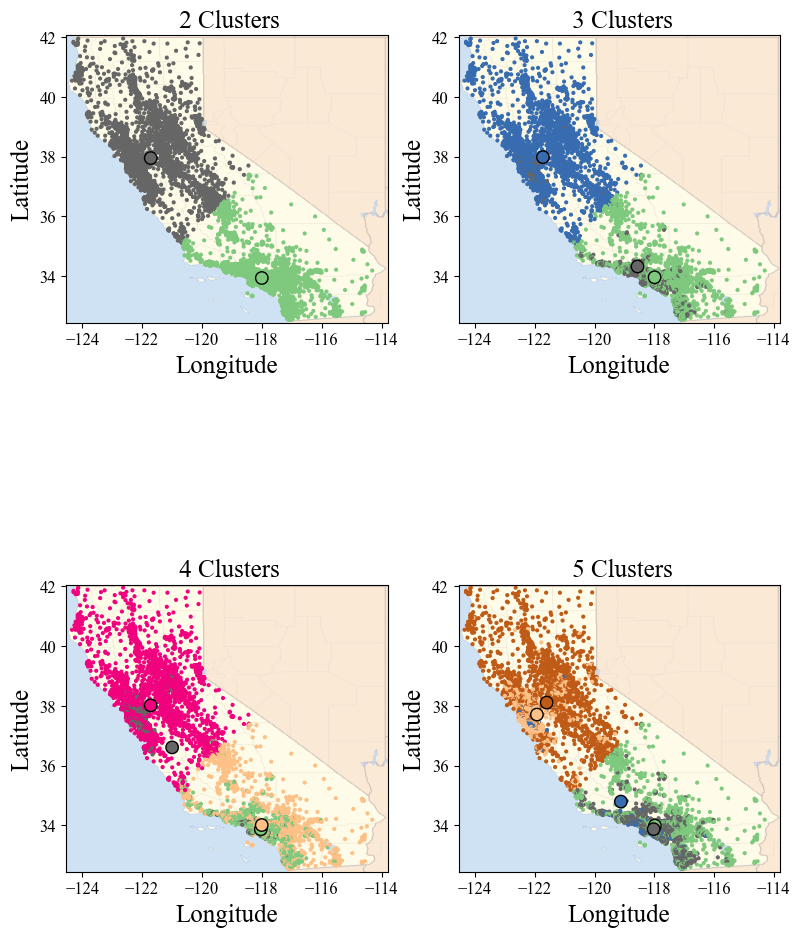

In [278]:
features = housing[['longitude', 'latitude', 'median_income']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

fig, axes = plt.subplots(2, 2, figsize=(8, 12))

for i, ax in enumerate(axes.flat):
    kmeans = KMeans(n_clusters=i + 2)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    
    unique_labels = np.unique(labels)
    colors = plt.get_cmap('Accent', i + 2)
        
    ax.scatter(housing['longitude'], housing['latitude'], 
                c=labels, cmap=colors, s=4, alpha=1, label='Data Points')   
    centroids = scaler.inverse_transform(kmeans.cluster_centers_) 
    
    centroid_colors = [colors(label) for label in unique_labels]
    ax.scatter(centroids[:, 0], centroids[:, 1], 
                c=centroid_colors, s=80, marker='o', label='Centroids',edgecolor='black' )
    
    # Add title and labels
    ax.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
    ax.set_title(f' {i + 2} Clusters',fontsize=18)
    ax.set_xlabel('Longitude',fontsize=18)
    ax.set_ylabel('Latitude',fontsize=18)

# Adjust layout so subplots don't overlap
plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
# plt.subplots_adjust(hspace=0.1, wspace=0.1)
# Show the plot
plt.show()

In [167]:
kmeans.cluster_centers_[:5]

array([[-1.17859529,  1.03526343,  0.0191716 ],
       [ 0.8112857 , -0.82524263, -0.06203968],
       [ 0.74773874, -0.8258586 ,  2.42545547],
       [ 0.9131753 , -0.86789891, -0.87537501],
       [-1.18681868,  0.94505022,  1.26892916]])

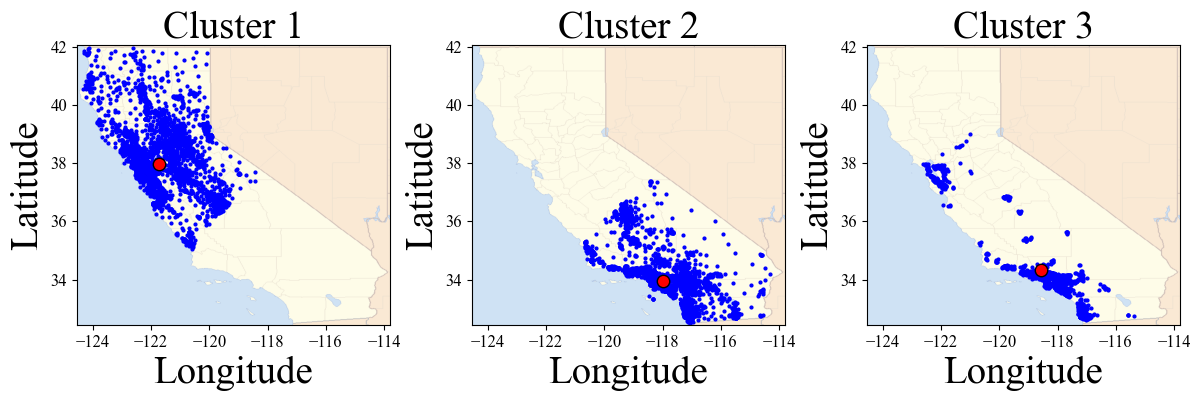

In [293]:
fig, axes = plt.subplots(1,3, figsize=(12, 10))

features = housing[['longitude', 'latitude', 'median_income']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features)
labels = kmeans.labels_
centroids = scaler.inverse_transform(kmeans.cluster_centers_) 
for i, ax in enumerate(axes.flat):
    # Filter data points belonging to the current cluster
    filtered_housing = housing[labels == i]

    # Filter the corresponding centroid
    filtered_centroid = centroids[i]
    
    # Plot the points for the current cluster
    ax.scatter(filtered_housing['longitude'], filtered_housing['latitude'], 
               c='blue', s=4, alpha=1, label=f'Cluster {i} Data Points')
    
    # Plot the centroid for the current cluster
    ax.scatter(filtered_centroid[0], filtered_centroid[1], 
               c='red', s=80, marker='o', label=f'Cluster {i} Centroid', edgecolor='black')
    
    # Add the background map image to each plot
    ax.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
    
    # Set title and labels for each subplot
    ax.set_title(f'Cluster {i + 1}',fontsize=28)
    ax.set_xlabel('Longitude',fontsize=28)
    ax.set_ylabel('Latitude',fontsize=28)
plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()

# Show the plot
plt.show()


In [102]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(scaled_features)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [103]:
inertias

[61920.00000000003,
 26860.98352093487,
 18987.366223806835,
 14547.724174848006,
 12632.865174008304,
 10039.010937995337,
 8732.982645840166,
 8163.0940324738185,
 7149.206770234373]

Saving figure inertia_vs_k_plot


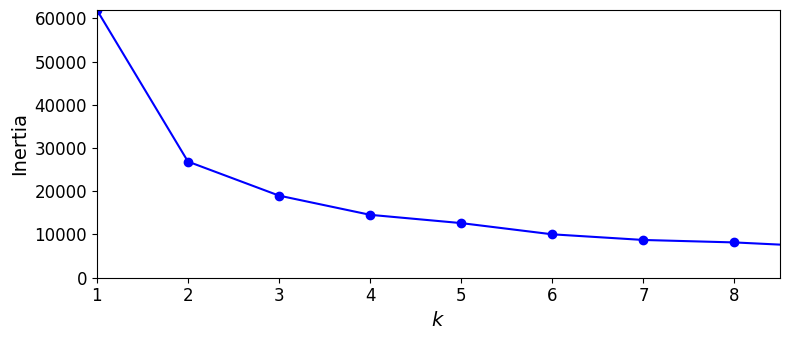

In [104]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 8.5, 0, max(inertias)])
save_fig("inertia_vs_k_plot")
plt.show()

In [105]:
from sklearn.metrics import silhouette_score

In [294]:
features = housing[['longitude', 'latitude', 'median_income']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



kmeans = KMeans(n_clusters=9)
kmeans.fit(scaled_features)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(scaled_features)
                for k in range(1, 10)]
silhouette_score(scaled_features, kmeans.labels_)

np.float64(0.354851143844148)

In [295]:
silhouette_scores = [silhouette_score(scaled_features, model.labels_)
                     for model in kmeans_per_k[1:]]

In [296]:
silhouette_scores

[np.float64(0.5482304452184799),
 np.float64(0.5179721838532693),
 np.float64(0.43517979770599646),
 np.float64(0.4100830999013529),
 np.float64(0.3984653534071962),
 np.float64(0.37225184832846725),
 np.float64(0.3666693541000338),
 np.float64(0.34617328321860785)]

Saving figure silhouette_score_vs_k_plot


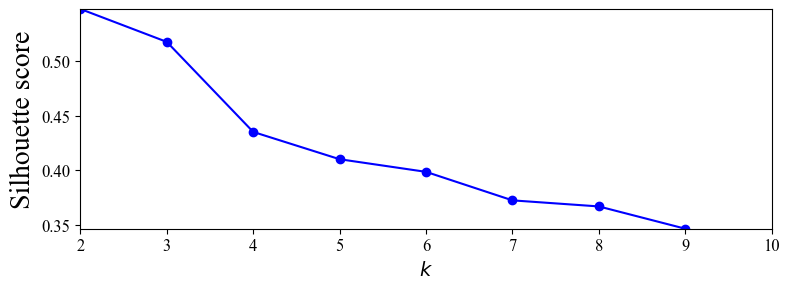

In [297]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=20)
plt.axis([2, 10, min(silhouette_scores), max(silhouette_scores)])
save_fig("silhouette_score_vs_k_plot")
plt.show()

In [207]:
kmeans.inertia_

8850.912323982768

In [208]:
X_dist = kmeans.transform(features)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

C:\Users\morga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


np.float64(321692929.6567093)

In [209]:
kmeans.score(features)

C:\Users\morga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


-314209655.58395165

Saving figure silhouette_analysis_plot


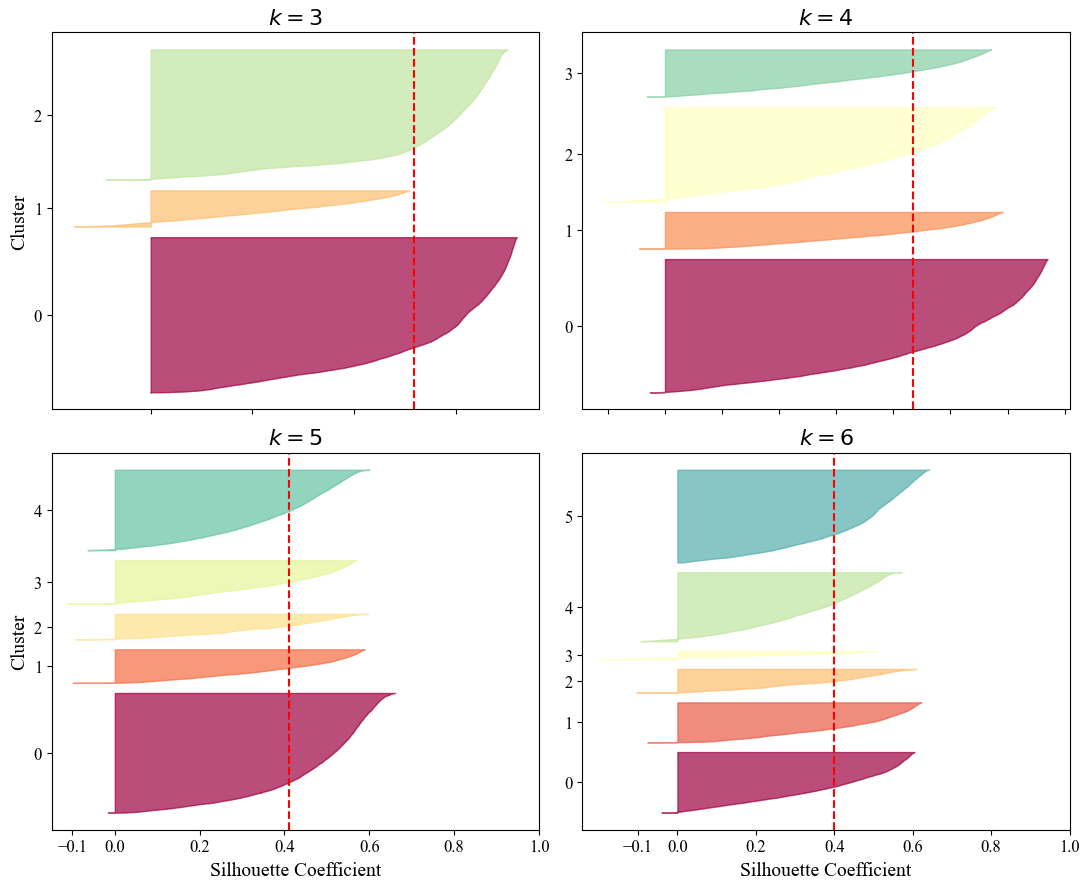

In [210]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(features, y_pred)

    padding = len(features) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()